# 3.4 영화 리뷰 분류: 이진 분류 예제

## 3.4.1 IMDB 데이터셋

In [0]:
# IMDB 데이터셋 로드하기
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


## 3.4.2 데이터 준비

In [0]:
# 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))  # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬로 만듭니다
  for i , sequences in enumerate(sequences):
    results[i, sequences] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
  return results

x_train = vectorize_sequences(train_data)   # 훈련 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)   # 테스트 데이터를 벡터로 변환

y_train = np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')

## 3.4.3 신경망 모델 만들기

In [0]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=[metrics.binary_accuracy])

## 3.4.4 훈련 검증

In [0]:
# 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
# 모델 훈련하기
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.5151 - acc: 0.7835 - val_loss: 0.3886 - val_acc: 0.8694
Epoch 2/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.3079 - acc: 0.9048 - val_loss: 0.3113 - val_acc: 0.8857
Epoch 3/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2305 - acc: 0.9237 - val_loss: 0.2787 - val_acc: 0.8908
Epoch 4/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1795 - acc: 0.9419 - val_loss: 0.2727 - val_acc: 0.8913
Epoch 5/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1480 - acc: 0.9537 - val_loss: 0.2778 - val_acc: 0.8892
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1230 - acc: 0.9626 - val_loss: 0.2982 - val_acc: 0.8878
Epoch 7/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.1046 - acc: 0.9695 - val_loss: 0.3382 - 

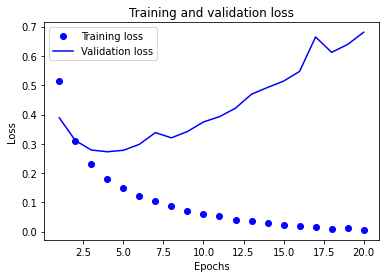

In [0]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # 'bo'는 파란색점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # 'b'는 파란색 실선을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

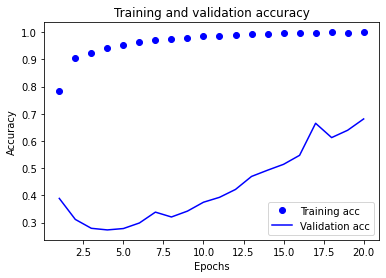

In [0]:
# 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_loss']

plt.plot(epochs, acc, 'bo', label='Training acc')  # 'bo'는 파란색점을 의미
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # 'b'는 파란색 실선을 의미
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.4794 - accuracy: 0.8117
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.2700 - accuracy: 0.9085
Epoch 3/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.2067 - accuracy: 0.9275
Epoch 4/4
25000/25000 [==============================] - 2s 67us/step


In [0]:
results

[0.2962790487670898, 0.8824399709701538]

## 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기

In [0]:
model.predict(x_test)

array([[0.18304202],
       [0.9999329 ],
       [0.81642973],
       ...,
       [0.08987424],
       [0.05647114],
       [0.44950777]], dtype=float32)

# 3.5 뉴스 기사분류: 다중 분류 모델

## 3.5.1 로이터 데이터셋

In [0]:
# 로이터 데이터셋 로드하기
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [0]:
# 로이터 데이터셋을 텍스트로 디코팅하기
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])  # 0,1,2는 '패딩', '문서시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다

## 3.5.2 데이터 준비

In [0]:
# 데이터 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)   # 훈련 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)   # 테스트 데이터를 벡터로 변환

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 3.5.3. 모델 구성

In [0]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

## 3.5.4 훈련 검증

In [0]:
# 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]


y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
# 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 172us/step - loss: 2.6238 - acc: 0.5096 - val_loss: 1.7032 - val_acc: 0.6300
Epoch 2/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.3937 - acc: 0.7184 - val_loss: 1.3110 - val_acc: 0.7100
Epoch 3/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.0298 - acc: 0.7805 - val_loss: 1.1293 - val_acc: 0.7600
Epoch 4/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.8101 - acc: 0.8304 - val_loss: 1.0221 - val_acc: 0.7940
Epoch 5/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.6390 - acc: 0.8702 - val_loss: 0.9458 - val_acc: 0.8130
Epoch 6/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.5122 - acc: 0.8971 - val_loss: 0.9266 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.4133 - acc: 0.9153 - val_loss: 0.9428 - val_acc: 0.8030


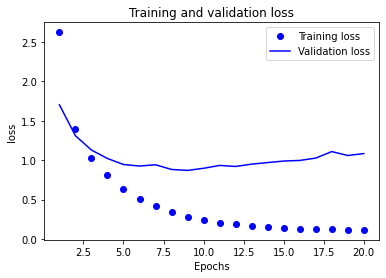

In [0]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

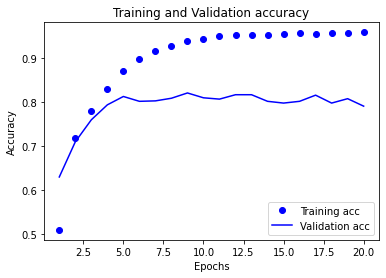

In [0]:
# 훈련과 검증 정확도 그리기
plt.clf()  # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 140us/step - loss: 2.6507 - accuracy: 0.4875 - val_loss: 1.7873 - val_accuracy: 0.6250
Epoch 2/9
7982/7982 [==============================] - 1s 129us/step - loss: 1.4578 - accuracy: 0.7067 - val_loss: 1.3173 - val_accuracy: 0.7120
Epoch 3/9
7982/7982 [==============================] - 1s 128us/step - loss: 1.0623 - accuracy: 0.7711 - val_loss: 1.1381 - val_accuracy: 0.7370
Epoch 4/9
7982/7982 [==============================] - 1s 128us/step - loss: 0.8278 - accuracy: 0.8180 - val_loss: 1.0247 - val_accuracy: 0.7650
Epoch 5/9
7982/7982 [==============================] - 1s 128us/step - loss: 0.6577 - accuracy: 0.8593 - val_loss: 0.9513 - val_accuracy: 0.7880
Epoch 6/9
7982/7982 [==============================] - 1s 129us/step - loss: 0.5322 - accuracy: 0.8885 - val_loss: 0.9130 - val_accuracy: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.424

In [0]:
results

[0.9871416845601898, 0.7836152911186218]

## 3.5.5 새로운 데이터에 대해 예측하기

In [0]:
# 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

In [0]:
predictions[0].shape

(46,)

In [0]:
np.sum(predictions[0])

1.0000002

In [0]:
np.argmax(predictions[0])

3

## 3.5.7 충분히 큰 중간층을 두어야 하는 이유

In [0]:
# 정보 병목이 있는 모델
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 188us/step - loss: 3.1273 - accuracy: 0.2449 - val_loss: 2.5914 - val_accuracy: 0.3110
Epoch 2/20
7982/7982 [==============================] - 1s 180us/step - loss: 2.1992 - accuracy: 0.3306 - val_loss: 1.8400 - val_accuracy: 0.4230
Epoch 3/20
7982/7982 [==============================] - 1s 176us/step - loss: 1.4809 - accuracy: 0.6461 - val_loss: 1.4395 - val_accuracy: 0.6600
Epoch 4/20
7982/7982 [==============================] - 1s 181us/step - loss: 1.2374 - accuracy: 0.6807 - val_loss: 1.3802 - val_accuracy: 0.6630
Epoch 5/20
7982/7982 [==============================] - 1s 179us/step - loss: 1.1410 - accuracy: 0.6987 - val_loss: 1.3608 - val_accuracy: 0.6720
Epoch 6/20
7982/7982 [==============================] - 1s 179us/step - loss: 1.0692 - accuracy: 0.7220 - val_loss: 1.3478 - val_accuracy: 0.6720
Epoch 7/20
7982/7982 [==============================] - 1s 183us/step - loss

# 3.6 주택 가격 예측: 회귀 문제

##3.6.1 보스턴 주택 가격 데이터셋

In [0]:
# 보스턴 주택 데이터셋 로드하기
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


## 3.6.2 데이터 준비

In [0]:
# 데이터 정규화하기
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## 3.6.3 모델 구성

In [0]:
# 모델 정의하기
from keras import models
from keras import layers

def build_model():   # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다.
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
                         input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

## 3.6.3 k-겹 검증을 사용한 훈련 검증

In [0]:
# k-겹 검증하기
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('처리중인 폴드 #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
       axis=0)
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
       axis=0)
  
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [0]:
all_scores

[2.4537341594696045, 2.3723034858703613, 2.690044641494751, 2.395721673965454]

In [0]:
np.mean(all_scores)

2.4779509902000427

In [0]:
# 각 폴드에서 검증 점수를 로그에 저장하기
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('처리중인 폴드 #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
       axis=0)
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
       axis=0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
            validation_data=(val_data, val_targets),
            epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [0]:
# k-겹 검증 점수 평균을 기록하기
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

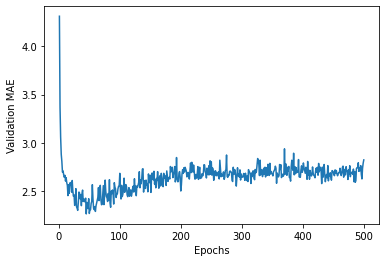

In [0]:
# 검증 점수 그래프
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

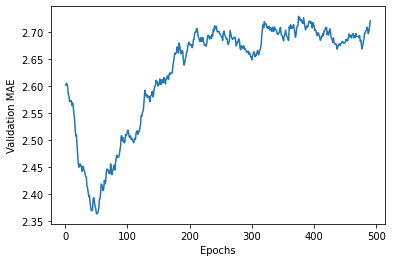

In [0]:
# 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point *(1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
# 최종 모델 훈련하기
model = build_model()   # 새롭게 컴파일된 모델을 얻음
model.fit(train_data, train_targets,    # 전체 데이터로 훈련
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 147us/step


In [0]:
test_mae_score

2.443380117416382